In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Read Twitter API CSV
twitter = pd.read_csv('mytwitter.csv')

In [3]:
#Twitter API tokens
consumer_key = twitter['API Key'][0]
consumer_secret = twitter['API Key Secret'][0]
access_token = twitter['Access Token'][0]
access_token_secret = twitter['Access Token Secret'][0]

In [4]:
#create the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

#set the access and access token secret
auth.set_access_token(access_token, access_token_secret)

#create API object while passing the auth infor
api = tweepy.API(auth, wait_on_rate_limit = True)

In [5]:
#Extract 1000 tweets
tweets = api.user_timeline(screen_name = 'WilliamsRuto', count = 1000, lang = 'en', tweet_mode = 'extended')

Unexpected parameter: lang


In [6]:
#print the last 10 tweets
i = 1
for tweet in tweets[0:10]:
    print(str(i) + ') '+ tweet.full_text + '\n')
    i = i + 1

1) We are in this journey together with the people of Kiptororo in Kuresoi North, Nakuru County. https://t.co/QYxIV9XcZy

2) Tononoka grounds, Mombasa County. https://t.co/8moorLbHlf

3) Our objective to grow the economy from the Bottom will be realised. Let us keep our eyes on the goal. https://t.co/JazPXv2Cz6

4) @MusaliaMudavadi, @Wetangulam, @DrAlfredMutua, @GovernorMvurya, Fatuma Achani, Benjamin Tayari, @KindikiKithure, Khatib Mwashetani, Faisal Abdalla, Kassim Tandaza, @MohaJichoPevu, @HassanOmarH, Mwanaisha Chidzuga, Danson Mungatana, among other leaders were present. https://t.co/nGj32VFf8N

5) Led our Kenya Kwanza team in engaging Mama Mbogas, Taxi/Matatu operators, hawkers, Boda Bodas, among others, from Kwale on their issues and priorities at Kwale Baraza Park, Kwale County. https://t.co/wTgGiT50Ib

6) Through this and other interventions, we will generate more employment opportunities and income for millions of livelihoods. https://t.co/VBGWmLe6xm

7) The Kenya Kwanza admi

In [7]:
len(tweets)

200

In [8]:
#create a dataframe 
df = pd.DataFrame([tweet.full_text for tweet in tweets], columns=['Tweets'])
df

,Tweets
0,We are in this journey together with the peopl...
1,"Tononoka grounds, Mombasa County. https://t.co..."
2,Our objective to grow the economy from the Bot...
3,"@MusaliaMudavadi, @Wetangulam, @DrAlfredMutua,..."
4,Led our Kenya Kwanza team in engaging Mama Mbo...
...,...
195,"@MwauraIsaac1 (Nominated), Wanjiku Muhia (EALA..."
196,Hon @rigathi led our agenda in Kinangop Consti...
197,We are yet to fully exploit the economic poten...
198,"MPs Soipan Tuya (Narok), Ken Aramat (Narok Eas..."


In [15]:
#convert the df to csv
df.to_csv('DP_tweets2.csv')

In [16]:
#rread from csv
# df = pd.read_csv('DP_tweets.csv')

In [18]:
#clean the tetxs
def cleantweets(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet) #removed @mentioned
    tweet = re.sub(r'#', '', tweet) #removing the # symbol
    tweet = re.sub(r'[\(\[].*?[\)\]]', '', tweet) #removing the punctuations symbols
    tweet = re.sub(r'RT[ls]+', '', tweet) #removing RT
    tweet = re.sub(r'https://t.[a-z]+[/A-Za-z0-9]+', '', tweet) #remove the hyperlink
    
    return tweet

#call the function
df['Tweets'] = df['Tweets'].apply(cleantweets)

df.head(10)

,Tweets,Subjectivity,Polarity
0,We are in this journey together with the peopl...,0.0000,0.0000
1,"Tononoka grounds, Mombasa County.",0.0000,0.0000
2,Our objective to grow the economy from the Bot...,0.1000,0.0000
3,", , , , Fatuma Achani, Benjamin Tayari, , Khat...",0.1875,-0.0625
4,Led our Kenya Kwanza team in engaging Mama Mbo...,0.7000,0.4000
5,"Through this and other interventions, we will ...",0.4375,0.1875
6,The Kenya Kwanza administration will deliberat...,0.3750,-0.1250
7,Ours is lifting those at lower echelons of the...,0.2000,0.2000
8,"Colleagues , , , , and other leaders were in ...",0.3750,-0.1250
9,"At Khadija Secondary School in Bombolulu, pres...",0.3000,-0.3000


In [19]:
#subjectivity and polarity
def subjectivitym_measure(tweet):
    return TextBlob(tweet).sentiment.subjectivity

#polarity
def polarity_measure(tweet):
    return TextBlob(tweet).sentiment.polarity

In [20]:
#new columns to our dataframe
df['Subjectivity'] = df['Tweets'].apply(subjectivitym_measure)
df['Polarity'] = df['Tweets'].apply(polarity_measure)

df.head(5)

,Tweets,Subjectivity,Polarity
0,We are in this journey together with the peopl...,0.0000,0.0000
1,"Tononoka grounds, Mombasa County.",0.0000,0.0000
2,Our objective to grow the economy from the Bot...,0.1000,0.0000
3,", , , , Fatuma Achani, Benjamin Tayari, , Khat...",0.1875,-0.0625
4,Led our Kenya Kwanza team in engaging Mama Mbo...,0.7000,0.4000


<function matplotlib.pyplot.show(close=None, block=None)>

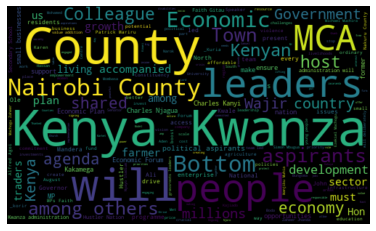

In [24]:
#Visualization the word Cloud
words = ' '.join([twts for twts in df['Tweets']])
wordcloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 200).generate(words)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show

In [27]:
#create a function to compute the negative neutral and positive analysis
def WordAnalysis(score):
    if score < 0:
        return 'Negative'
    if score== 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(WordAnalysis)

#Show the output
df

,Tweets,Subjectivity,Polarity,Analysis
0,We are in this journey together with the peopl...,0.000000,0.000000,Neutral
1,"Tononoka grounds, Mombasa County.",0.000000,0.000000,Neutral
2,Our objective to grow the economy from the Bot...,0.100000,0.000000,Neutral
3,", , , , Fatuma Achani, Benjamin Tayari, , Khat...",0.187500,-0.062500,Negative
4,Led our Kenya Kwanza team in engaging Mama Mbo...,0.700000,0.400000,Positive
...,...,...,...,...
195,", Wanjiku Muhia , Kiarie Badilisha , John Met...",0.375000,-0.125000,Negative
196,"Hon led our agenda in Kinangop Constituency, ...",0.000000,0.000000,Neutral
197,We are yet to fully exploit the economic poten...,0.441667,0.066667,Positive
198,"MPs Soipan Tuya , Ken Aramat , Johanna Ng'eno ...",0.375000,-0.125000,Negative


In [34]:
#print all of the postive twwets
j = 1
sortedDf = df.sort_values(by=['Polarity'])

for i in range(0, sortedDf.shape[0]):
    if sortedDf['Analysis'][i] == 'Positive':
        print(str(j) + '. ' + sortedDf['Tweets'][i])
        print()
        j +=1

1. Led our Kenya Kwanza team in engaging Mama Mbogas, Taxi/Matatu operators, hawkers, Boda Bodas, among others, from Kwale on their issues and priorities at Kwale Baraza Park, Kwale County. 

2. Through this and other interventions, we will generate more employment opportunities and income for millions of livelihoods. 

3. Ours is lifting those at lower echelons of the Economic pyramid: Hustlers. Kwale County Economic forum. 

4. Kenya Kwanza associates with Mheshimiwa  for his commitment and continued role in enhancing access to quality education in Nyali through the NG-CDF. We pledge to channel more funds to the grassroots to further our country’s development. 

5. Land ownership will be vital in the implementation of our  Bottom-Up Economic Plan.  Counties such as Lamu that have been by unresolved land ownership issues will be our priority as we seek to drive investments and enhance  agricultural productivity. 

6. Njoro, Kiratina and Barnabus, Nakuru county, thank you very much for

In [36]:
#showing the negativw tweets
j=1
sortedDf = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDf.shape[0]):
    if sortedDf['Analysis'][i] == 'Negative':
        print(str(j) + '. ' + sortedDf['Tweets'][i])
        print()
        j +=1

1. , , , , Fatuma Achani, Benjamin Tayari, , Khatib Mwashetani, Faisal Abdalla, Kassim Tandaza, , , Mwanaisha Chidzuga, Danson Mungatana, among other leaders were present. 

2. The Kenya Kwanza administration will deliberately fund and commercialise cashew nut farming in Kwale and other parts of the Coast in order to boost the region’s economy. 

3. Colleagues , , , ,  and other leaders were in our company. 

4. At Khadija Secondary School in Bombolulu, presented buses to Mohamed Ali Girls Secondary School, Kongowea Secondary School, Frere Town Secondary School and Khadija Secondary School in Nyali Constituency, Mombasa County. 

5. He was accompanied by teammates , Issa Timamy, Abdu Kassim Ahmed  , Rishad Amana , Athman Shariff , Francis Mugo , Amina Kale , among other leaders. 

6. In Mokowe, our colleague Musalia Mudavadi engaged grassroots leaders, professionals, politicians and small traders from Lamu during the County’s Economic Forum. 

7. Under a revamped NHIF Kenyans will no l

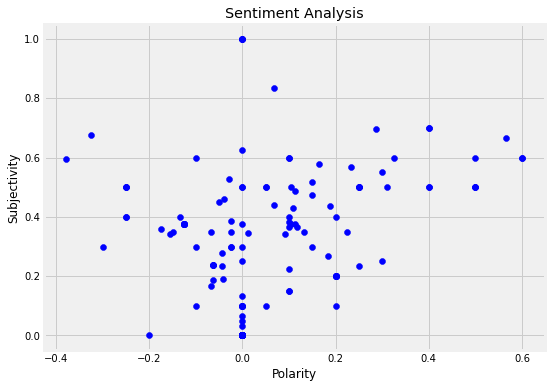

In [38]:
#plot the polarity and the subjectvity
plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [45]:
#Percentage of positive tweets
pos_tweets = df[df.Analysis == 'Positive']
pos_tweets = pos_tweets['Tweets']

round((pos_tweets.shape[0] / df.shape[0]) * 100, 1)

30.0

In [46]:
#Percentage of positive tweets
neg_tweets = df[df.Analysis == 'Negative']
neg_tweets = neg_tweets['Tweets']

round((neg_tweets.shape[0] / df.shape[0]) * 100, 1)

21.5